### 2. Data Cleaning and Imputation

#### Addressing missing data

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# path of the dataset
path = Path("G:/Data Science/EDA/EDA-DataCamp-2025/datasets/ds_salaries_clean.csv")
# Load the dataset
salaries = pd.read_csv(path)

In [3]:
# See the quick summary of the dataset
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


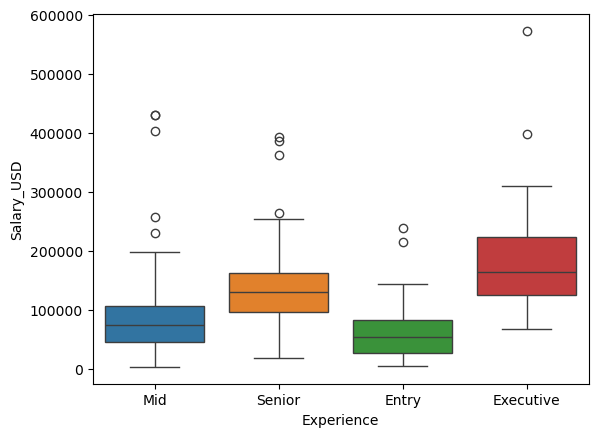

In [4]:
# Salary by experience level
sns.boxplot(data=salaries, x="Experience", y="Salary_USD", palette="tab10")
plt.show()

In [5]:
# checking for missing values
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [6]:
# Dropping missing values
threshold = len(salaries) * 0.05
threshold

30.35

In [7]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

#### Exercise - Addressing missing data

##### Dealing with missing data

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [8]:
plane_path = Path("G:/Data Science/EDA/EDA-DataCamp-2025/datasets/planes.csv")
planes = pd.read_csv(plane_path)
planes.head(n=2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0


In [9]:
planes.shape

(10660, 11)

In [10]:
# Print the number of missing values in each column of the DataFrame.
planes.isnull().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [11]:
# Calculate how many observations five percent of the planes DataFrame is equal to.
# Lets define a threshold
threshold = len(planes) * 0.05
threshold

533.0

In [12]:
# Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
cols_to_drop = planes.columns[planes.isnull().sum() <= threshold]
cols_to_drop

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [13]:
# Use this filter to remove missing values and save the updated DataFrame.
planes.dropna(subset=cols_to_drop, inplace=True)

In [14]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

##### Strategies for remaining missing data

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

In [15]:
# Print the values and frequencies of "Additional_Info"
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

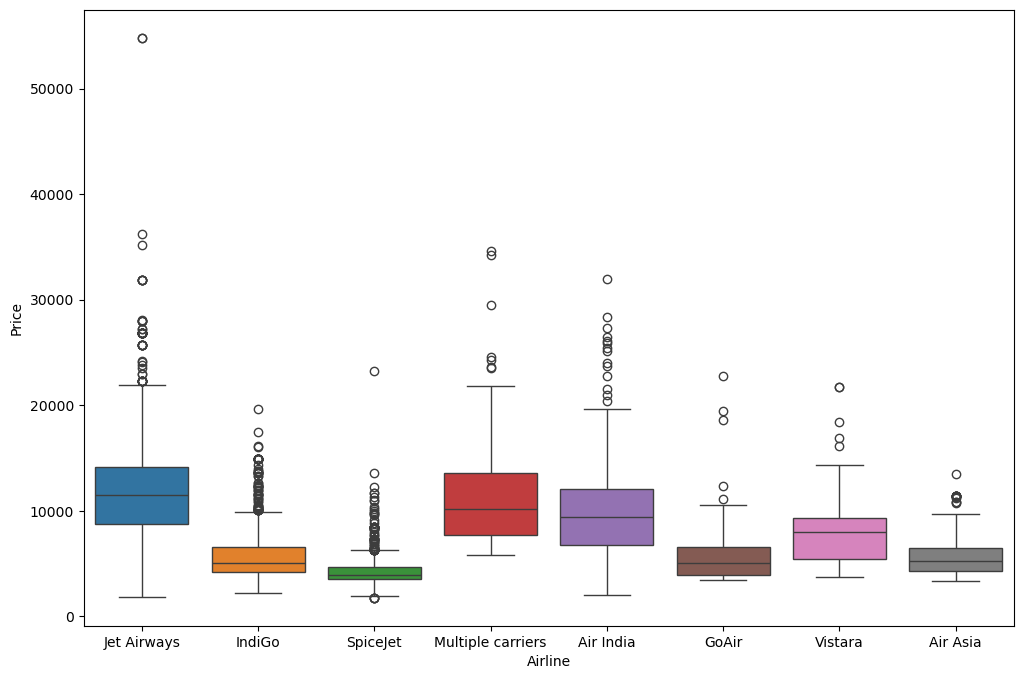

In [16]:
# Create a boxplot of "Price" versus "Airline".
plt.figure(figsize=(12, 8))
sns.boxplot(data=planes, x="Airline", y="Price", palette="tab10")
plt.show()

<Axes: xlabel='Price'>

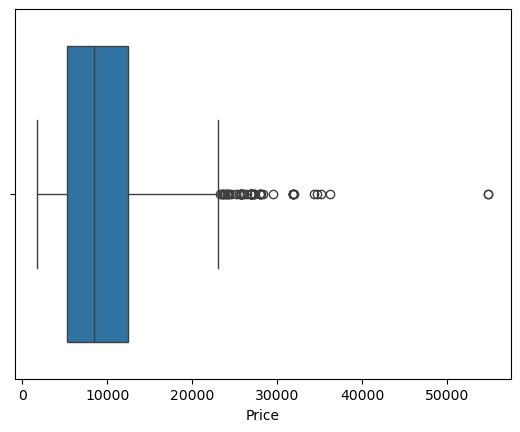

In [17]:
# this is for my understanding about the price 
sns.boxplot(data=planes, x="Price")

In [18]:
# How should you deal with the missing values in "Additional_Info" and "Price"?
# Ans : Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price"
planes.drop("Additional_Info", axis=1, inplace=True)

##### Imputing missing plane prices

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

In [19]:
# Group planes by airline and calculate the median price.
airline_prices = planes.groupby("Airline")["Price"].median()
airline_prices

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64

In [20]:
# Convert the grouped median prices to a dictionary.
prices_dict = airline_prices.to_dict()
prices_dict

{'Air Asia': 5192.0,
 'Air India': 9443.0,
 'GoAir': 5003.5,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10197.0,
 'SpiceJet': 3873.0,
 'Vistara': 8028.0}

In [21]:
# Conditionally impute missing values for "Price" by mapping values in the "Airline" column based on prices_dict.
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

In [22]:
# check final is there any null values in dataset
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

#### Converting and analyzing categorical data

In [25]:
salaries.select_dtypes("object").head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [26]:
# Job titles
salaries["Designation"].value_counts()

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [28]:
# count unique job titles
salaries["Designation"].nunique()

50

In [30]:
salaries["Designation"]

0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: Designation, Length: 607, dtype: object

In [31]:
# Extracting value from categories using pandas.Series.str.contains()
salaries["Designation"].str.contains("Scientist")


0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [34]:
# Finding multiple phrases in string
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [35]:
# Words on intreset: Any that start with data
salaries["Designation"].str.contains("^Data")

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

In [36]:
job_categories = [
    "Data Scientist", "Data Analytics",
    "Data Engineering", "Machine Learning",
    "Managerial", "Consultant"
]

data_science = "Data Science|NLP"
data_analyst = "Analysit|Analytics"
data_engineer = "Data Engineer|ETL|Architech|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant="Consultant|Freelane"

conditions = [
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_engineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]

salaries["Job_Category"] = np.select(conditions, 
                                    job_categories,
                                    default="Other")

In [37]:
salaries[["Designation", "Job_Category"]].head()

,Designation,Job_Category
0,Data Scientist,Other
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Other
4,Machine Learning Engineer,Machine Learning


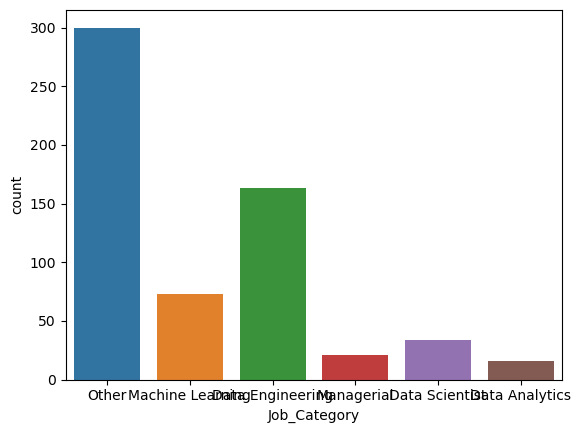

In [40]:
# visializing job category frequency
sns.countplot(data=salaries, x="Job_Category", palette="tab10")
plt.show()

#### Exercise - Converting and analyzing categorical data

##### Finding the number of unique values

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [43]:
# Filter planes for columns that are of "object" data type.
non_numeric = planes.select_dtypes("object")
non_numeric

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop
...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop


In [46]:
# Loop through the columns in the dataset.
for feature in non_numeric.columns:
    print(feature)

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops


In [51]:
# Add the column iterator to the print statement, then call the function to return the number of unique values in the column.
for feature in non_numeric.columns:
    print(f"Number of unique values in {feature} column:", non_numeric[feature].nunique())

Number of unique values in Airline column: 8
Number of unique values in Date_of_Journey column: 44
Number of unique values in Source column: 5
Number of unique values in Destination column: 6
Number of unique values in Route column: 122
Number of unique values in Dep_Time column: 218
Number of unique values in Arrival_Time column: 1220
Number of unique values in Duration column: 362
Number of unique values in Total_Stops column: 5


##### Flight duration categories